<a href="https://colab.research.google.com/github/BoulevardOfDreams/MyTensor/blob/main/my_tensor_human_body.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Change Tensorflow version to 1.x

In [ ]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


Clone Tensorflow Model

In [ ]:
%cd /content
!git clone --quiet https://github.com/tensorflow/models.git

/content


Import required files

In [ ]:
import os
os.environ['PYTHONPATH'] += ':/content/models/research/:/content/models/research/slim/'

%cd /content/models/research
!protoc object_detection/protos/*.proto --python_out=.
!pip install .

!pip install tf_slim

/content/models/research
Processing /content/models/research
  Created wheel for object-detection: filename=object_detection-0.1-cp36-none-any.whl size=1350338 sha256=b9c278ee9a8a123a028c1ada3da1d3f63de68a6083c05727c011a649462de1ec
  Stored in directory: /tmp/pip-ephem-wheel-cache-x47hb2vf/wheels/94/49/4b/39b051683087a22ef7e80ec52152a27249d1a644ccf4e442ea
Successfully built object-detection
     |████████████████████████████████| 358kB 2.8MB/s 


Clone GitHub Repo and checkout new_master branch

In [ ]:
%cd /content
!git clone https://github.com/BoulevardOfDreams/object_detection_demo.git
%cd /content/object_detection_demo
!git checkout human_detection

/content
Cloning into 'object_detection_demo'...
remote: Enumerating objects: 146, done.
remote: Total 146 (delta 0), reused 0 (delta 0), pack-reused 146
Receiving objects: 100% (146/146), 15.52 MiB | 33.26 MiB/s, done.
Resolving deltas: 100% (52/52), done.
/content/object_detection_demo
Branch 'human_detection' set up to track remote branch 'human_detection' from 'origin'.
Switched to a new branch 'human_detection'


In [ ]:
!ls -l

total 20
drwxr-xr-x 2 root root 4096 Oct 18 07:29 annotations
-rw-r--r-- 1 root root 4672 Oct 18 07:29 generate_tfrecord.py
-rw-r--r-- 1 root root  770 Oct 18 07:29 print_tfrecord.py
-rw-r--r-- 1 root root 3587 Oct 18 07:29 xml_to_csv.py


# Import Train/Test image and xml from Gdrive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
!ls

#drive.flush_and_unmount()

Mounted at /content/gdrive
annotations  generate_tfrecord.py  print_tfrecord.py  xml_to_csv.py


In [ ]:
train = "/content/object_detection_demo/images/train/"
test  = "/content/object_detection_demo/images/test/"
!mkdir /content/object_detection_demo/images
!mkdir {train}
!mkdir {test}

In [ ]:
!cp -r /content/gdrive/My\ Drive/SSD/images/train.zip {train}
!cp -r /content/gdrive/My\ Drive/SSD/images/test.zip {test}

In [ ]:
!unzip /content/object_detection_demo/images/train/train.zip -d {train}
!unzip /content/object_detection_demo/images/test/test.zip -d {test}

Archive:  /content/object_detection_demo/images/train/train.zip
  inflating: /content/object_detection_demo/images/train/0002337b77943386.jpg  
  inflating: /content/object_detection_demo/images/train/0002337b77943386.txt  
  inflating: /content/object_detection_demo/images/train/0002337b77943386.xml  
  inflating: /content/object_detection_demo/images/train/0011f2fcea05538f.jpg  
  inflating: /content/object_detection_demo/images/train/0011f2fcea05538f.txt  
  inflating: /content/object_detection_demo/images/train/0011f2fcea05538f.xml  
  inflating: /content/object_detection_demo/images/train/001a1ae9b75c784e.jpg  
  inflating: /content/object_detection_demo/images/train/001a1ae9b75c784e.txt  
  inflating: /content/object_detection_demo/images/train/001a1ae9b75c784e.xml  
  inflating: /content/object_detection_demo/images/train/0020262279256d31.jpg  
  inflating: /content/object_detection_demo/images/train/0020262279256d31.txt  
  inflating: /content/object_detection_demo/images/train

Run xml_to_csv.py

In [ ]:
train_csv = "/content/object_detection_demo/annotations/train_labels.csv"
xml_to_csv = "/content/object_detection_demo/xml_to_csv.py"
annotations = "/content/object_detection_demo/annotations"

#train csv
!python {xml_to_csv} -i {train} -o {train_csv} -l {annotations}

#test csv
test_csv = "/content/object_detection_demo/annotations/test_labels.csv"
!python {xml_to_csv} -i {test} -o {test_csv} -l {annotations}


Successfully converted xml to csv.
Generate `/content/object_detection_demo/annotations/label_map.pbtxt`
Successfully converted xml to csv.
Generate `/content/object_detection_demo/annotations/label_map.pbtxt`


Generate TF Record

In [ ]:
#train record
train_record = "/content/object_detection_demo/annotations/train.record"
!python /content/object_detection_demo/generate_tfrecord.py --label1=Human_body --csv_input={train_csv}  --output_path={train_record} --img_path={train}

#train record
test_record = "/content/object_detection_demo/annotations/test.record"
!python /content/object_detection_demo/generate_tfrecord.py --label1=Human_body --csv_input={test_csv}  --output_path={test_record} --img_path={test}




W1018 07:33:12.788261 139851124832128 module_wrapper.py:139] From /content/object_detection_demo/generate_tfrecord.py:110: The name tf.python_io.TFRecordWriter is deprecated. Please use tf.io.TFRecordWriter instead.


W1018 07:33:13.093557 139851124832128 module_wrapper.py:139] From /content/object_detection_demo/generate_tfrecord.py:68: The name tf.gfile.GFile is deprecated. Please use tf.io.gfile.GFile instead.

Successfully created the TFRecords: /content/object_detection_demo/annotations/train.record


W1018 07:33:19.491975 140619447633792 module_wrapper.py:139] From /content/object_detection_demo/generate_tfrecord.py:110: The name tf.python_io.TFRecordWriter is deprecated. Please use tf.io.TFRecordWriter instead.


W1018 07:33:19.540702 140619447633792 module_wrapper.py:139] From /content/object_detection_demo/generate_tfrecord.py:68: The name tf.gfile.GFile is deprecated. Please use tf.io.gfile.GFile instead.

Successfully created the TFRecords: /content/object_detection_demo/a

## Adding Model

Copy .config from model to training folder

In [ ]:
repo_training = "/content/object_detection_demo/training"

In [ ]:
!mkdir {repo_training}
!cp /content/models/research/object_detection/samples/configs/ssd_inception_v2_coco.config {repo_training}

mkdir: cannot create directory ‘/content/object_detection_demo/training’: File exists


Download model pkg from model zoo

In [ ]:
pre_trained_model = "/content/object_detection_demo/pre-trained-model"
model_type        = 'ssd_inception_v2'

In [ ]:
import os

!mkdir {pre_trained_model}

#download model pkg
%cd {pre_trained_model}
!wget http://download.tensorflow.org/models/object_detection/ssd_inception_v2_coco_2018_01_28.tar.gz

#unzip and rename pkg
!tar -xvf ssd_inception_v2_coco_2018_01_28.tar.gz
!mv ssd_inception_v2_coco_2018_01_28 {model_type}

%cd /content/object_detection_demo

/content/object_detection_demo/pre-trained-model
--2020-10-18 07:38:28--  http://download.tensorflow.org/models/object_detection/ssd_inception_v2_coco_2018_01_28.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 173.194.211.128, 2607:f8b0:400c:c10::80
Connecting to download.tensorflow.org (download.tensorflow.org)|173.194.211.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 278114232 (265M) [application/x-tar]
Saving to: ‘ssd_inception_v2_coco_2018_01_28.tar.gz’

ssd_inception_v2_co 100%[===================>] 265.23M   183MB/s    in 1.4s    

2020-10-18 07:38:30 (183 MB/s) - ‘ssd_inception_v2_coco_2018_01_28.tar.gz’ saved [278114232/278114232]

ssd_inception_v2_coco_2018_01_28/
ssd_inception_v2_coco_2018_01_28/model.ckpt.index
ssd_inception_v2_coco_2018_01_28/checkpoint
ssd_inception_v2_coco_2018_01_28/pipeline.config
ssd_inception_v2_coco_2018_01_28/model.ckpt.data-00000-of-00001
ssd_inception_v2_coco_2018_01_28/model.ckpt.meta
ssd_incep

Edit .config parameters

In [ ]:
config_file          = os.path.join(repo_training, "ssd_inception_v2_coco.config")
fine_tune_checkpoint = os.path.join("/content/object_detection_demo/pre-trained-model",model_type,"model.ckpt")
train_record_fname   = "/content/object_detection_demo/annotations/train.record"
test_record_fname    = "/content/object_detection_demo/annotations/test.record"
label_map_pbtxt_fname= "/content/object_detection_demo/annotations/label_map.pbtxt"

batch_size  = 12
num_classes = 1
num_steps   = 2000

In [ ]:
import re

with open(config_file) as f:
    s = f.read()
with open(config_file, 'w') as f:
    
    # Set training batch_size.
    s = re.sub('batch_size: [0-9]+',
               'batch_size: {}'.format(batch_size), s)
    
        # fine_tune_checkpoint
    s = re.sub('fine_tune_checkpoint: ".*?"',
               'fine_tune_checkpoint: "{}"'.format(fine_tune_checkpoint), s)
    
    # tfrecord files train and test.
    s = re.sub(
        '(input_path: ".*?)(train.record)(.*?")', 'input_path: "{}"'.format(train_record_fname), s)
    s = re.sub(
        '(input_path: ".*?)(val.record)(.*?")', 'input_path: "{}"'.format(test_record_fname), s)

    # label_map_path
    s = re.sub(
        'label_map_path: ".*?"', 'label_map_path: "{}"'.format(label_map_pbtxt_fname), s)

    # Set training steps, num_steps
    s = re.sub('num_steps: [0-9]+',
               'num_steps: {}'.format(num_steps), s)
    
    # Set number of classes num_classes.
    s = re.sub('num_classes: [0-9]+',
               'num_classes: {}'.format(num_classes), s)
    
    f.write(s)

In [ ]:
!cat {config_file}

# SSD with Inception v2 configuration for MSCOCO Dataset.
# Users should configure the fine_tune_checkpoint field in the train config as
# well as the label_map_path and input_path fields in the train_input_reader and
# eval_input_reader. Search for "PATH_TO_BE_CONFIGURED" to find the fields that
# should be configured.

model {
  ssd {
    num_classes: 1
    box_coder {
      faster_rcnn_box_coder {
        y_scale: 10.0
        x_scale: 10.0
        height_scale: 5.0
        width_scale: 5.0
      }
    }
    matcher {
      argmax_matcher {
        matched_threshold: 0.5
        unmatched_threshold: 0.5
        ignore_thresholds: false
        negatives_lower_than_unmatched: true
        force_match_for_each_row: true
      }
    }
    similarity_calculator {
      iou_similarity {
      }
    }
    anchor_generator {
      ssd_anchor_generator {
        num_layers: 6
        min_scale: 0.2
        max_scale: 0.95
        aspect_ratios: 1.0
        aspect_ratios: 2.0
        aspect_

Train Model

In [ ]:
#Train with Tensorflow 2.0
train_file = "/content/models/research/object_detection/model_main.py"
train_dir  = "/content/object_detection_demo/training/"
!python {train_file} --alsologtostderr --model_dir={train_dir} --pipeline_config_path=/content/object_detection_demo/training/ssd_inception_v2_coco.config --check

In [ ]:
#Train with legacy Tensorflow 1.0
train_file = "/content/models/research/object_detection/legacy/train.py"
train_dir  = "/content/object_detection_demo/training/"
!python {train_file} --logtostderr --train_dir={train_dir} --pipeline_config_path=/content/object_detection_demo/training/ssd_inception_v2_coco.config

Instructions for updating:
Use object_detection/model_main.py.
W0726 14:57:08.428630 140500915505024 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/absl/app.py:250: main (from __main__) is deprecated and will be removed in a future version.
Instructions for updating:
Use object_detection/model_main.py.
Instructions for updating:
Please switch to tf.train.create_global_step
W0726 14:57:08.449452 140500915505024 deprecation.py:323] From /content/models/research/object_detection/legacy/trainer.py:265: create_global_step (from tf_slim.ops.variables) is deprecated and will be removed in a future version.
Instructions for updating:
Please switch to tf.train.create_global_step
W0726 14:57:08.470168 140500915505024 dataset_builder.py:83] num_readers has been reduced to 1 to match input file shards.
Instructions for updating:
Use `tf.data.Dataset.interleave(map_func, cycle_length, block_length, num_parallel_calls=tf.data.experimental.AUTOTUNE)` instead. If sloppy execution is d

Save Model Ckpt to Drive

In [ ]:
big           = "/content/object_detection_demo/training/model.ckpt-471.data-00000-of-00001"
index         = "/content/object_detection_demo/training/model.ckpt-471.index"
meta          = "/content/object_detection_demo/training/model.ckpt-471.meta"
ckpt          = "/content/object_detection_demo/training/checkpoint"
events        = "/content/object_detection_demo/training/events.out.tfevents.1595775468.bf9cb691a4f0"
graph         = "/content/object_detection_demo/training/graph.pbtxt"
gdrive_export = "/content/gdrive/My\ Drive/SSD/training/"

!cp -r {big} {gdrive_export}
!cp -r {index} {gdrive_export}
!cp -r {meta} {gdrive_export}
!cp -r {ckpt} {gdrive_export}
!cp -r {events} {gdrive_export}
!cp -r {graph} {gdrive_export}

#in progress
#!cp -r /content/object_detection_demo/training/eval_0 /content/gdrive/My\ Drive/SSD/training/

#import os
#import glob
#TEST_IMAGE_PATHS = glob.glob(os.path.join(PATH_TO_TEST_IMAGES_DIR, "*.jpg*"))

DO NOT EXECUTE LINE BELOW UNLESS:

(No Training)

Import trained chk point from google drive

In [ ]:
!rm -rf /content/object_detection_demo/training
!cp -r /content/gdrive/My\ Drive/SSD/training /content/object_detection_demo/

#remember add back config afterwards

# Convert model ckpt to protobuf

Import export_inference_graph.py 

In [ ]:
!cp -r /content/models/research/object_detection/export_inference_graph.py /content/object_detection_demo/

Create new .Pb

In [ ]:
checkpt_path = "/content/object_detection_demo/training/model.ckpt-471"

In [ ]:
!rm -rf trained-inference-graphs/output_inference_graph_v1

%cd /content/object_detection_demo/
!python export_inference_graph.py \
--input_type image_tensor \
--pipeline_config_path {config_file} \
--trained_checkpoint_prefix training/model.ckpt-471 \
--output_directory trained-inference-graphs/output_inference_graph_v1

/content/object_detection_demo
Instructions for updating:
Please use `layer.__call__` method instead.
W1018 07:56:11.493082 140675685033856 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tf_slim/layers/layers.py:2802: Layer.apply (from tensorflow.python.keras.engine.base_layer) is deprecated and will be removed in a future version.
Instructions for updating:
Please use `layer.__call__` method instead.
INFO:tensorflow:depth of additional conv before box predictor: 0
I1018 07:56:14.940598 140675685033856 convolutional_box_predictor.py:156] depth of additional conv before box predictor: 0
INFO:tensorflow:depth of additional conv before box predictor: 0
I1018 07:56:15.000517 140675685033856 convolutional_box_predictor.py:156] depth of additional conv before box predictor: 0
INFO:tensorflow:depth of additional conv before box predictor: 0
I1018 07:56:15.057781 140675685033856 convolutional_box_predictor.py:156] depth of additional conv before box predictor: 0
INFO:tensorflo

Export protobuf to Gdrive (backup)

In [ ]:
fine_tune_pb = "/content/object_detection_demo/trained-inference-graphs/output_inference_graph_v1/frozen_inference_graph.pb"
pb_folder    = "/content/object_detection_demo/trained-inference-graphs/output_inference_graph_v1"

In [ ]:
!cp -r {pb_folder} /content/gdrive/My\ Drive/SSD/

DO NOT EXECUTE LINE BELOW UNLESS:

(No Training)

Import protobuf back from Gdrive

In [ ]:
!mkdir /content/object_detection_demo/trained-inference-graphs
!cp -r /content/gdrive/My\ Drive/SSD/output_inference_graph_v1 /content/object_detection_demo/trained-inference-graphs/

mkdir: cannot create directory ‘/content/object_detection_demo/trained-inference-graphs’: File exists


# Run Inference Test

In [ ]:
import os
import glob

# Path to frozen detection graph. This is the actual model that is used for the object detection.
PATH_TO_CKPT = fine_tune_pb

# List of the strings that is used to add correct label for each box.
PATH_TO_LABELS = label_map_pbtxt_fname

# If you want to test the code with your images, just add images files to the PATH_TO_TEST_IMAGES_DIR.
PATH_TO_TEST_IMAGES_DIR =  "/content/object_detection_demo/images/test/"

assert os.path.isfile(fine_tune_pb)
assert os.path.isfile(PATH_TO_LABELS)
TEST_IMAGE_PATHS = glob.glob(os.path.join(PATH_TO_TEST_IMAGES_DIR, "*.jpg*"))
TEST_IMAGE_PATHS = TEST_IMAGE_PATHS[15:21] #Select only first 5 test image
assert len(TEST_IMAGE_PATHS) > 0, 'No image found in `{}`.'.format(PATH_TO_TEST_IMAGES_DIR)
print(TEST_IMAGE_PATHS)

['/content/object_detection_demo/images/test/c85aabe8b23efe05.jpg', '/content/object_detection_demo/images/test/3c3d93e3fb81cbfe.jpg', '/content/object_detection_demo/images/test/68b6b634551b115d.jpg', '/content/object_detection_demo/images/test/126ebc35bcc6e423.jpg', '/content/object_detection_demo/images/test/68ec6fe28a223060.jpg', '/content/object_detection_demo/images/test/4dbadd6c67565a08.jpg']


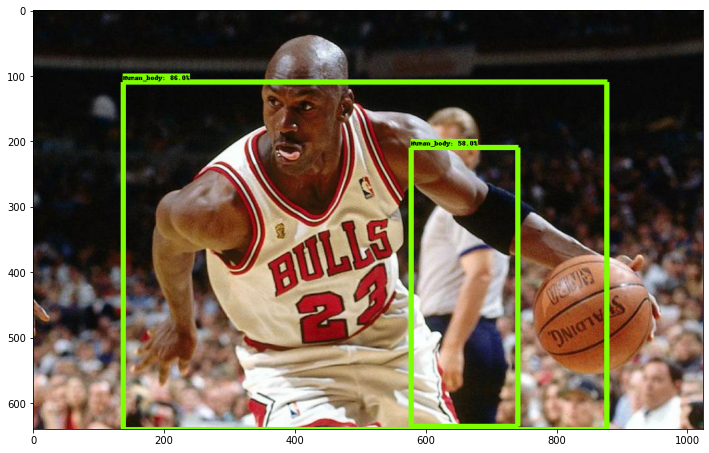

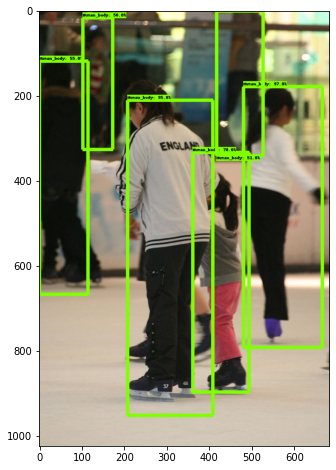

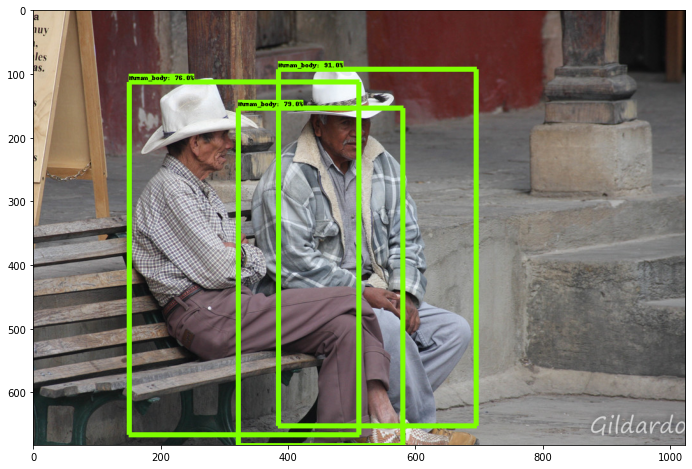

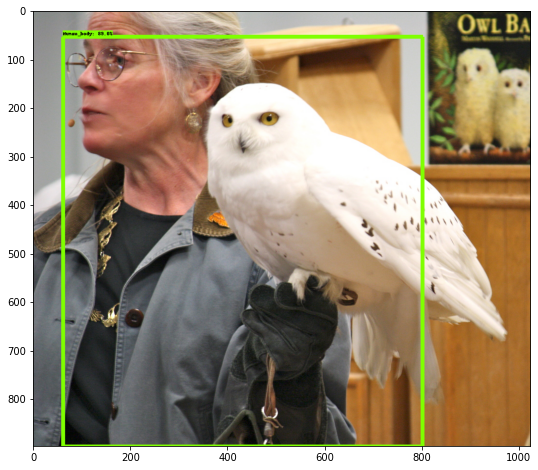

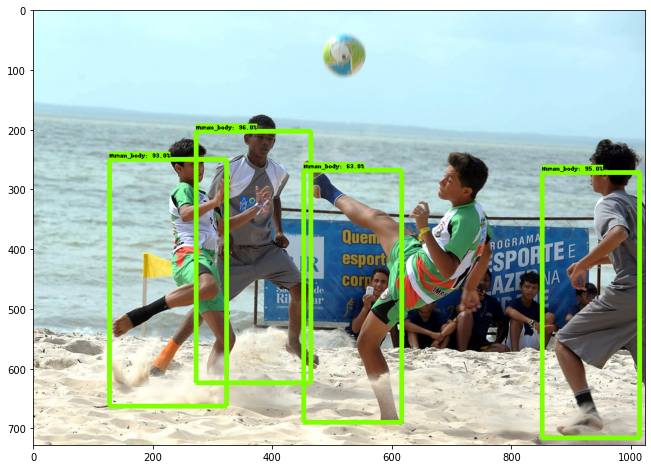

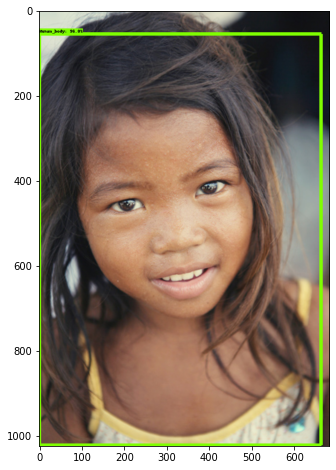

In [ ]:
import numpy as np
import os
import six.moves.urllib as urllib
import sys
import tarfile
import tensorflow as tf
import zipfile

from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from PIL import Image

# This is needed since the notebook is stored in the object_detection folder.
sys.path.append("..")
from object_detection.utils import ops as utils_ops


# This is needed to display the images.
%matplotlib inline


from object_detection.utils import label_map_util

from object_detection.utils import visualization_utils as vis_util


detection_graph = tf.Graph()
with detection_graph.as_default():
    od_graph_def = tf.GraphDef()
    with tf.gfile.GFile(PATH_TO_CKPT, 'rb') as fid:
        serialized_graph = fid.read()
        od_graph_def.ParseFromString(serialized_graph)
        tf.import_graph_def(od_graph_def, name='')


label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(
    label_map, max_num_classes=num_classes, use_display_name=True)
category_index = label_map_util.create_category_index(categories)


def load_image_into_numpy_array(image):
    (im_width, im_height) = image.size
    return np.array(image.getdata()).reshape(
        (im_height, im_width, 3)).astype(np.uint8)

# Size, in inches, of the output images.
IMAGE_SIZE = (12, 8)


def run_inference_for_single_image(image, graph):
    with graph.as_default():
        with tf.Session() as sess:
            # Get handles to input and output tensors
            ops = tf.get_default_graph().get_operations()
            all_tensor_names = {
                output.name for op in ops for output in op.outputs}
            tensor_dict = {}
            for key in [
                'num_detections', 'detection_boxes', 'detection_scores',
                'detection_classes', 'detection_masks'
            ]:
                tensor_name = key + ':0'
                if tensor_name in all_tensor_names:
                    tensor_dict[key] = tf.get_default_graph().get_tensor_by_name(
                        tensor_name)
            if 'detection_masks' in tensor_dict:
                # The following processing is only for single image
                detection_boxes = tf.squeeze(
                    tensor_dict['detection_boxes'], [0])
                detection_masks = tf.squeeze(
                    tensor_dict['detection_masks'], [0])
                # Reframe is required to translate mask from box coordinates to image coordinates and fit the image size.
                real_num_detection = tf.cast(
                    tensor_dict['num_detections'][0], tf.int32)
                detection_boxes = tf.slice(detection_boxes, [0, 0], [
                                           real_num_detection, -1])
                detection_masks = tf.slice(detection_masks, [0, 0, 0], [
                                           real_num_detection, -1, -1])
                detection_masks_reframed = utils_ops.reframe_box_masks_to_image_masks(
                    detection_masks, detection_boxes, image.shape[0], image.shape[1])
                detection_masks_reframed = tf.cast(
                    tf.greater(detection_masks_reframed, 0.5), tf.uint8)
                # Follow the convention by adding back the batch dimension
                tensor_dict['detection_masks'] = tf.expand_dims(
                    detection_masks_reframed, 0)
            image_tensor = tf.get_default_graph().get_tensor_by_name('image_tensor:0')

            # Run inference
            output_dict = sess.run(tensor_dict,
                                   feed_dict={image_tensor: np.expand_dims(image, 0)})

            # all outputs are float32 numpy arrays, so convert types as appropriate
            output_dict['num_detections'] = int(
                output_dict['num_detections'][0])
            output_dict['detection_classes'] = output_dict[
                'detection_classes'][0].astype(np.uint8)
            output_dict['detection_boxes'] = output_dict['detection_boxes'][0]
            output_dict['detection_scores'] = output_dict['detection_scores'][0]
            if 'detection_masks' in output_dict:
                output_dict['detection_masks'] = output_dict['detection_masks'][0]
    return output_dict


for image_path in TEST_IMAGE_PATHS:
    image = Image.open(image_path)
    # the array based representation of the image will be used later in order to prepare the
    # result image with boxes and labels on it.
    image_np = load_image_into_numpy_array(image)
    # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
    image_np_expanded = np.expand_dims(image_np, axis=0)
    # Actual detection.
    output_dict = run_inference_for_single_image(image_np, detection_graph)
    # Visualization of the results of a detection.
    vis_util.visualize_boxes_and_labels_on_image_array(
        image_np,
        output_dict['detection_boxes'],
        output_dict['detection_classes'],
        output_dict['detection_scores'],
        category_index,
        instance_masks=output_dict.get('detection_masks'),
        use_normalized_coordinates=True,
        line_thickness=8)
    plt.figure(figsize=IMAGE_SIZE)
    plt.imshow(image_np)

# Convert protobuf to TFLite

Create TFlite protobuf

In [ ]:
!cp -r /content/models/research/object_detection/export_tflite_ssd_graph.py /content/object_detection_demo/

!python export_tflite_ssd_graph.py \
--pipeline_config_path {config_file} \
--trained_checkpoint_prefix training/model.ckpt-471 \
--output_directory trained-inference-graphs/tflite_ssd_graph \
--add_postprocessing_op true

In [ ]:
tflite_pb = "/content/object_detection_demo/trained-inference-graphs/tflite_ssd_graph/tflite_graph.pb"

Export tflite protobuf back to Gdrive?????

In [ ]:
!cp -r {tflite_pb} /content/gdrive/My\ Drive/SSD/

In [ ]:
import tensorflow as tf

#localpb = 'frozen_inference_graph_frcnn.pb'
tflite_file = 'human_body.lite'

print("{} -> {}".format(tflite_pb, tflite_file))

converter = tf.lite.TFLiteConverter.from_frozen_graph(
    graph_def_file = tflite_pb,
    input_shapes = {"normalized_input_image_tensor":[1,300,300,3]},
    input_arrays = ["normalized_input_image_tensor"], 
    output_arrays = ['TFLite_Detection_PostProcess','TFLite_Detection_PostProcess:1','TFLite_Detection_PostProcess:2','TFLite_Detection_PostProcess:3']
)

converter.allow_custom_ops=True
tflite_model = converter.convert()

open(tflite_file,'wb').write(tflite_model)

interpreter = tf.lite.Interpreter(model_content=tflite_model)
interpreter.allocate_tensors()

/content/object_detection_demo/trained-inference-graphs/tflite_ssd_graph/tflite_graph.pb -> human_body.lite


In [ ]:

!cp -r /content/object_detection_demo/human_body.lite /content/gdrive/My\ Drive/SSD/